Connect to Drive to Import Files

In [1]:
# Mount Google Drive to access your dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Pull Files

In [2]:
import shutil

# Define source and destination paths
source = '/content/drive/MyDrive/Colab Notebooks/yolov5'
destination = '/content/yolov5'

# Move the folder
shutil.copytree(source, destination)

'/content/yolov5'

In [ ]:
# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

# Install dependencies
!pip install -r requirements.txt

# Install additional dependencies if needed
!pip install opencv-python

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.6/873.6 kB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.7 MB/s eta 0:00:00


In [ ]:
# Train YOLOv5 on your dataset
!python train.py --img 416 --batch 16 --epochs 100 --data 'data.yaml' --weights yolov5s.pt --device 0

Streaming output truncated to the last 5000 lines.
      63/99      1.95G    0.01305   0.004542   0.005123         28        416:  61% 40/66 [00:14<00:08,  3.06it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      63/99      1.95G    0.01308   0.004572   0.005066         30        416:  62% 41/66 [00:14<00:09,  2.66it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      63/99      1.95G    0.01307   0.004561   0.005127         21        416:  64% 42/66 [00:15<00:11,  2.10it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      63/99      1.95G    0.01308   0

Now Redundant (Used to import yolov results)

In [ ]:
import shutil
from google.colab import files

# Compress the specific directory
source_dir = '/content/yolov5/runs/train'
zip_file_path = '/content/train_results.zip'
shutil.make_archive(zip_file_path.replace('.zip', ''), 'zip', source_dir)

# Download the ZIP file
files.download(zip_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
!cp -r /content/drive/MyDrive/Colab\ Notebooks/exp /content/yolov5/runs/train

In [5]:
import os
print("Current Directory:", os.getcwd())

Current Directory: /content


In [ ]:
import os
os.chdir('..')  # Move one level up
print("New Directory:", os.getcwd())

New Directory: /content


In [8]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-10-3 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1: 1365x2048 1 awake
Speed: 164.7ms pre-process, 196.9ms inference, 2134.9ms NMS per image at shape (1, 3, 448, 640)


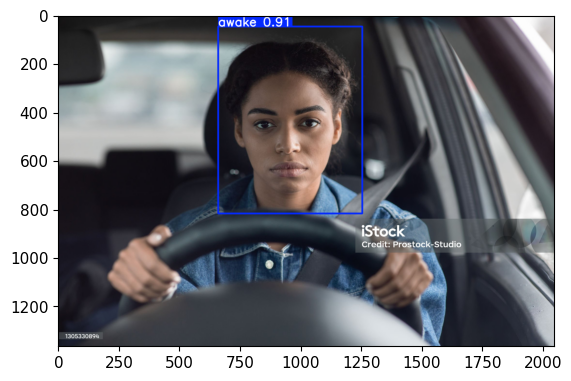

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Path to the new image
img = '/content/Awake.jpg'

# Assuming 'model' is already defined and loaded
results = model(img)
results.print()

# Plotting the results
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 1339x2048 1 drowsy
Speed: 21.6ms pre-process, 7.5ms inference, 3.3ms NMS per image at shape (1, 3, 448, 640)


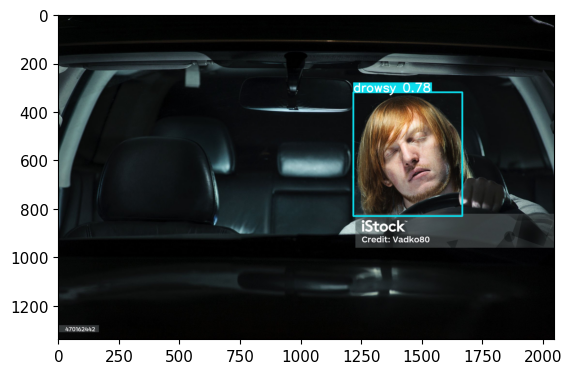

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Path to the new image
img = '/content/Drowsy.jpg'

# Assuming 'model' is already defined and loaded
results = model(img)
results.print()

# Plotting the results
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

Now redundant (Used to zip and download yolov5, incase of any modifs)

In [ ]:
import shutil
import os
from google.colab import files

# Define the folder to zip and the output zip file path
folder_to_zip = 'yolov5'  # Folder you want to zip
output_zip = 'yolov5.zip'  # Name of the output zip file

# Create a zip file
shutil.make_archive(base_name=output_zip.replace('.zip', ''), format='zip', root_dir=folder_to_zip)

# Download the zip file
files.download(output_zip)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>